### Unsupervised Learning

In [1]:
import pandas as pd

In [22]:
df = pd.read_csv(r"C:\Users\Croma Campus\Downloads\Iris.csv")

In [3]:
df.shape

(150, 6)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df = df.drop(columns=['Id','Species'])

In [7]:
df.shape

(150, 4)

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [12]:
scaler = StandardScaler()

In [13]:
df_scaled = scaler.fit_transform(df)

In [16]:
df_scaled[:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

In [19]:
X_pca[:2]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473]])

In [20]:
from sklearn.cluster import KMeans

In [23]:
feature_names = list(df.Species.unique())

In [24]:
feature_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [28]:
kmeans = KMeans(n_clusters=3 , random_state=11)

In [29]:
kmeans_label = kmeans.fit_predict(df_scaled)

In [30]:
kmeans_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [31]:
# X_pca[start_row:end_row , start_col:end_col]

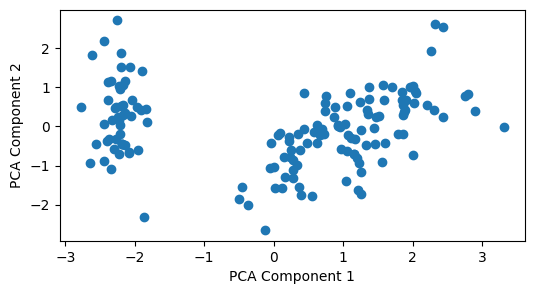

In [32]:
plt.figure(figsize=(6,3))
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

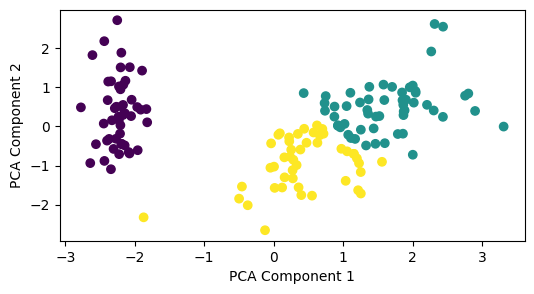

In [37]:
plt.figure(figsize=(6,3))
plt.scatter(X_pca[:,0],X_pca[:,1],c=kmeans_label, cmap="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

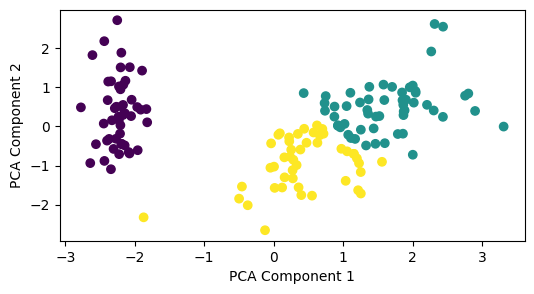

In [39]:
plt.figure(figsize=(6,3))
plt.scatter(X_pca[:,0],X_pca[:,1],c=kmeans_label, cmap="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [40]:
df.Species = df.Species.map(lambda val:feature_names.index(val) )

In [41]:
df.Species.unique()

array([0, 1, 2])

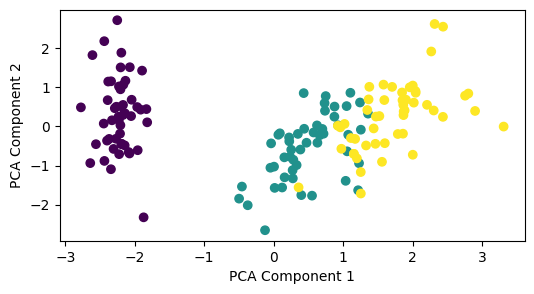

In [42]:
plt.figure(figsize=(6,3))
plt.scatter(X_pca[:,0],X_pca[:,1],c=df['Species'], cmap="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()